In [1]:
import sys
import os
import pandas as pd

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))

import data_acquisition
import Dataframe
import feature_engineering
import Advanced_model
import Logistic_regressions
import random_forest_class
import Boosted_LogisticReg
import model_nn_clf
import histGB

import warnings
warnings.filterwarnings("ignore")

Set API key

In [2]:
os.environ['api_key'] = 'Bgx9192SVK3nzJNLQcV5nneQS'
os.environ['COMET_API_KEY'] = 'Bgx9192SVK3nzJNLQcV5nneQS'

# Collecting Data

In [3]:
data_acquisition.collect_data()

The folder '../data/raw/2016_2017' already exists.
The folder '../data/raw/2017_2018' already exists.
The folder '../data/raw/2018_2019' already exists.
The folder '../data/raw/2019_2020' already exists.
The folder '../data/raw/2020_2021' already exists.


# Cleaning Data

In [4]:
## environ 2 minutes
base_path = '../data/raw/'
df = Dataframe.load_all_seasons(base_path)
transformed_df = Dataframe.transformEventData(df)

Seasons: 100%|██████████| 5/5 [00:57<00:00, 11.54s/it]               


# 2. Ingenierie des caracteristiques I

In [6]:
# Charger les données
data = pd.read_csv('../data/derivatives/dataframe.csv')
# Créer les nouvelles caractéristiques
feature_engineering.create_features1(data, '^201[6-9]02\d{4}$', 'features_train1.csv')

In [7]:
data = pd.read_csv('../data/derivatives/features_train1.csv')
data.head()
print(len(data.columns))
print(data.columns)
data.info()
data.head(10)

columns_with_nan = data.columns[data.isna().any()].tolist()

# Print columns with NaN values
print("\nColumns with NaN values:")
print(columns_with_nan)

4
Index(['distance_goal', 'angle_goal', 'is_goal', 'empty_goal'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305814 entries, 0 to 305813
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   distance_goal  305814 non-null  float64
 1   angle_goal     305814 non-null  float64
 2   is_goal        305814 non-null  int64  
 3   empty_goal     305814 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 9.3 MB

Columns with NaN values:
[]


# 3. Modele de base

Accuracy = 0.9064630577309811
Matrice de confusion = 
 [[55442     0]
 [ 5721     0]]
[[0.96236319 0.03763681]
 [0.87722423 0.12277577]
 [0.92584339 0.07415661]
 ...
 [0.86591354 0.13408646]
 [0.90182956 0.09817044]
 [0.81379669 0.18620331]]
Métrique AUC : {'Distance': 0.7002776501598214}


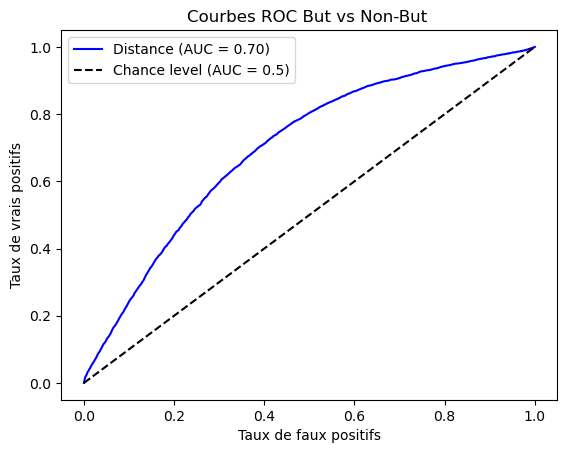

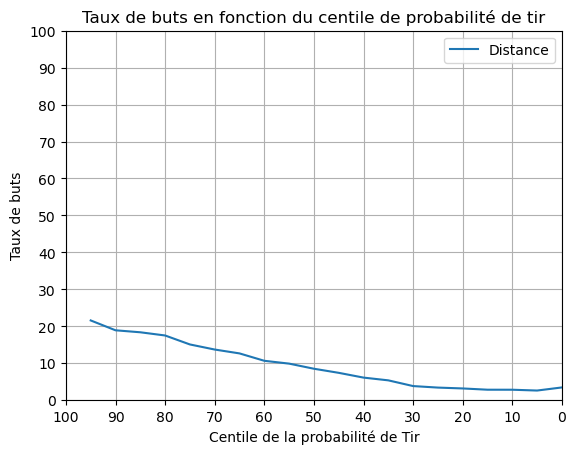

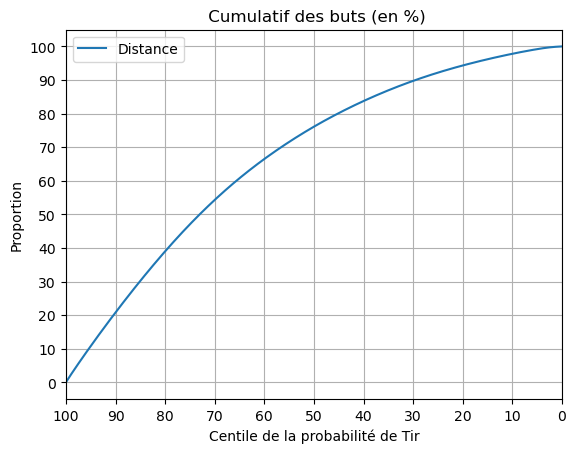

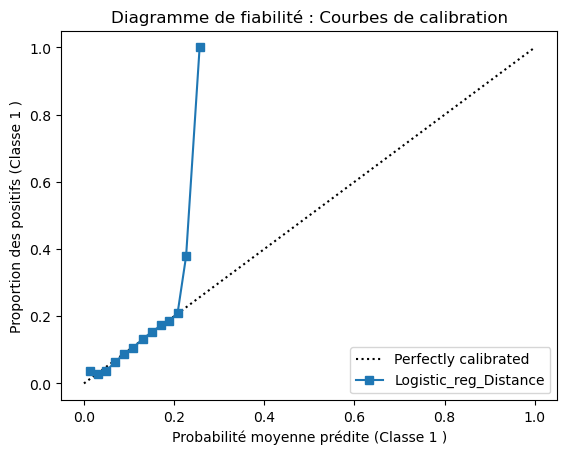

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/1bb6f5000c7b400a88ab7f1701009008



KeyError: 'Logistic regression using Distance'

In [8]:
clf_1, clf_2, clf_3 = Logistic_regressions.runRegression()

# 4. Ingenierie des caracteristiques II

In [9]:
transformed_df = feature_engineering.transformEventData(df)
transformed_df.to_csv('../data/derivatives/dataframe_milestone_2.csv', index=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
dataframe_milestone_1 = pd.read_csv('../data/derivatives/dataframe.csv')
dataframe_milestone_2 = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

data = feature_engineering.create_features2(dataframe_milestone_2,dataframe_milestone_1, pattern='^201[6-9]02\d{4}$')
data.to_csv('../data/derivatives/dataframe_milestone_2.csv', index=False)

## fusion des features de ingénierie des caractéristiques 1 et 2
engineering1 = pd.read_csv('../data/derivatives/features_train1.csv')
engineering2 = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

print(len(engineering1))
print(len(engineering2))

305814
305814


In [11]:
data_final_train = feature_engineering.fusion_features(engineering1, engineering2)
data_final_train.to_csv('../data/derivatives/train_data.csv', index=False)

In [12]:
# Question 5 :
feature_engineering.comet_log_dataframe_profile()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/1bb6f5000c7b400a88ab7f1701009008
COMET INFO:   Others:
COMET INFO:     Name : Logistic_reg_dist
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (3.21 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 

# 5. Advanced Model

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/08567a6f60a640e8bcfb31c665349bde

COMET WARNING: XGBoost callback couldn't be injected


Métrique AUC : {'XGBoost': 0.5382841334679838}


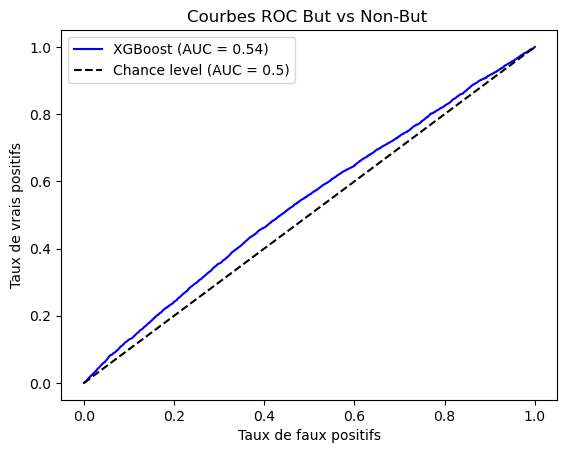

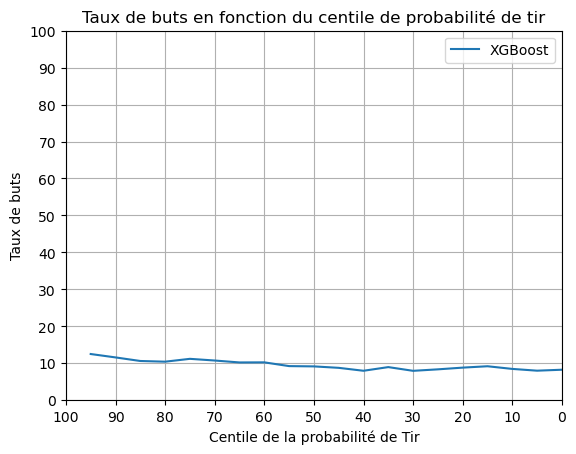

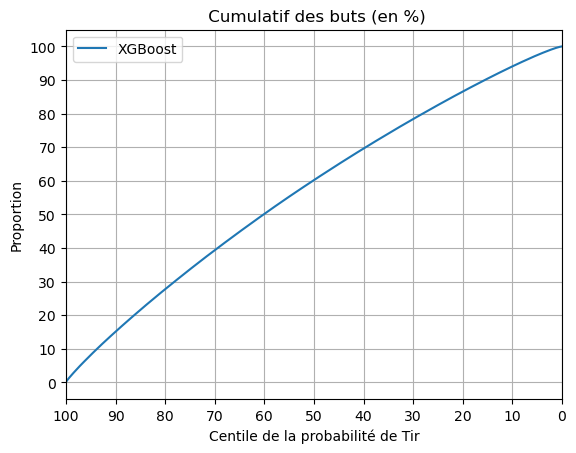

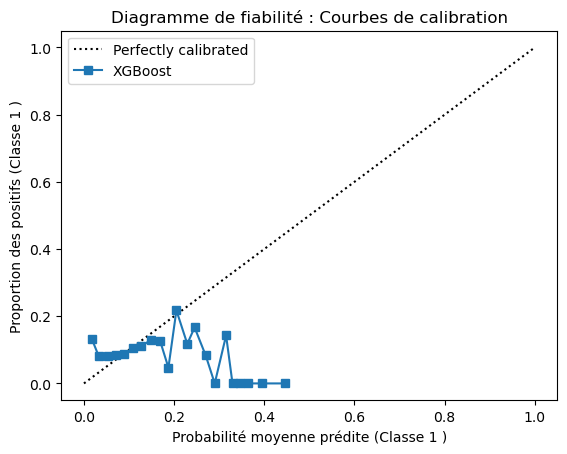

Training with the Grid Search


COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be in

Output the best hyperparams
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Métrique AUC : {'Best XGBoost GridSearch': 0.7941555169729471}


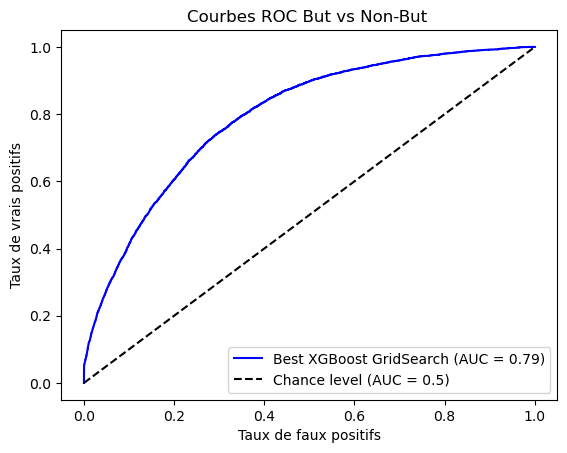

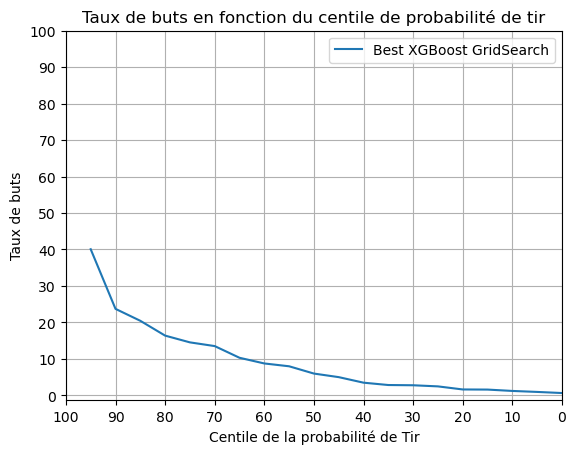

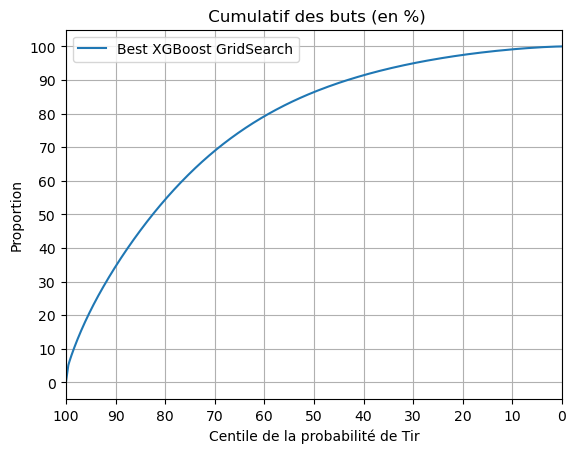

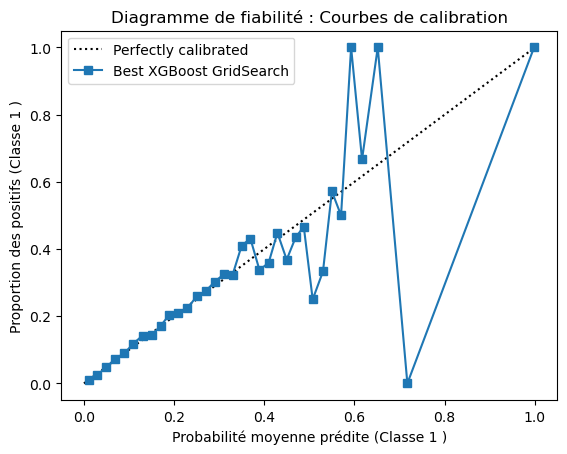

COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected
COMET WARNING: XGBoost callback couldn't be injected


Métrique AUC : {'XGBoost Feature Selection': 0.7893179241320778}


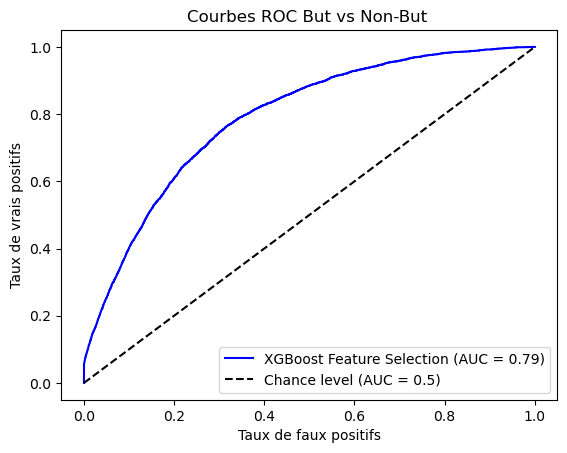

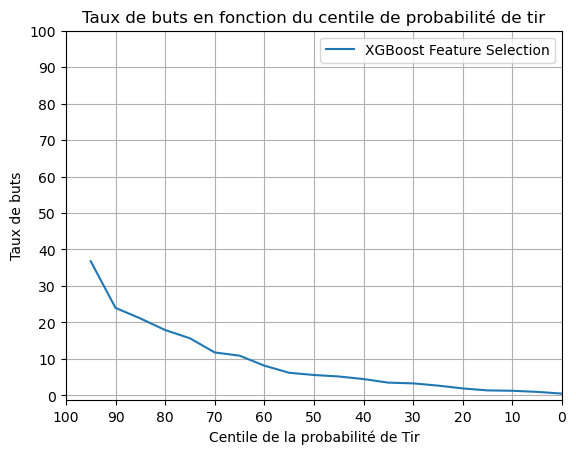

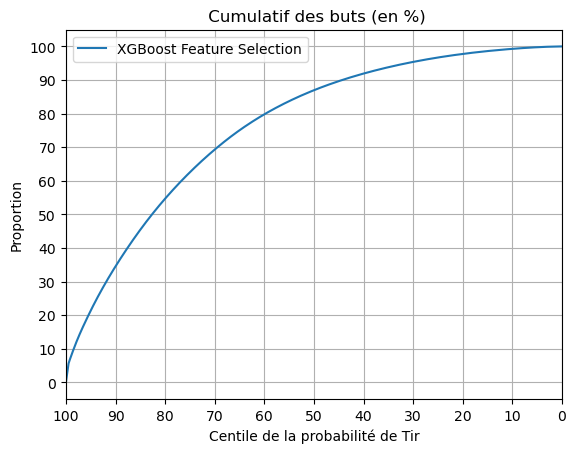

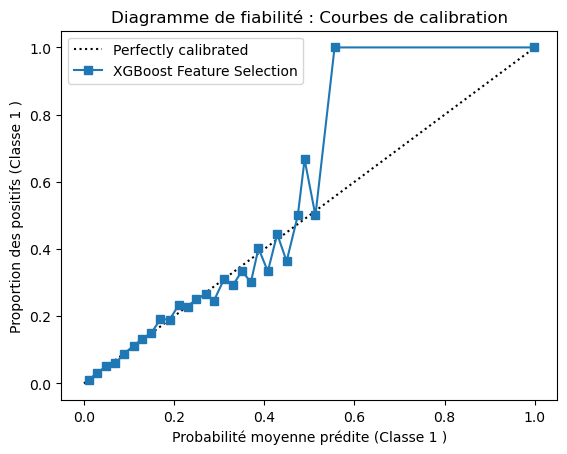

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/08567a6f60a640e8bcfb31c665349bde
COMET INFO:   Others:
COMET INFO:     Name : XGBoost
COMET INFO:   Parameters:
COMET INFO:     copy                               : True
COMET INFO:     cv                                 : 5
COMET INFO:     error_score                        : nan
COMET INFO:     estimator                          : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gam

In [3]:
xgBoostModel = Advanced_model.xgboost(True)

# 6. Faite votre mieux
Neural Network

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/62a5959829154b05bbf2170276b26477



Loading data...


COMET WARNING: truncated string; too long: 'HistGradientBoostingClassifier(categorical_features=['prd', 'empty_net',
                                                     'rebond',
                                                     'shotCategory_Backhand',
                                                     'shotCategory_Deflected',
                                                     'shotCategory_Slap Shot',
                                                     'shotCategory_Snap Shot',
                                                     'shotCategory_Tip-In',
                                                     'shotCategory_Wrap-around',
                                                     'shotCategory_Wrist Shot',
                                                     'last_event_type_BLOCKED_SHOT',
                                                     'last_event_type_FACEOFF',
                                                     'last_event_type_GIVEAWAY',
                      

Splitting data...
Defining hyperparameters...


COMET WARNING: truncated string; too long: 'HistGradientBoostingClassifier(categorical_features=['prd', 'empty_net',
                                                     'rebond',
                                                     'shotCategory_Backhand',
                                                     'shotCategory_Deflected',
                                                     'shotCategory_Slap Shot',
                                                     'shotCategory_Snap Shot',
                                                     'shotCategory_Tip-In',
                                                     'shotCategory_Wrap-around',
                                                     'shotCategory_Wrist Shot',
                                                     'last_event_type_BLOCKED_SHOT',
                                                     'last_event_type_FACEOFF',
                                                     'last_event_type_GIVEAWAY',
                      

Predicting probabilities...
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53679
           1       1.00      0.05      0.10      5513

    accuracy                           0.91     59192
   macro avg       0.96      0.53      0.53     59192
weighted avg       0.92      0.91      0.87     59192

ROC AUC Score: 0.7720514612788485
AUC metric : {'HistGB': 0.7720514612788485}


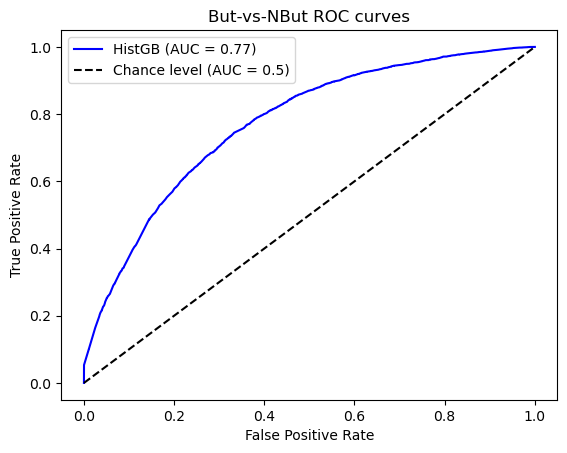

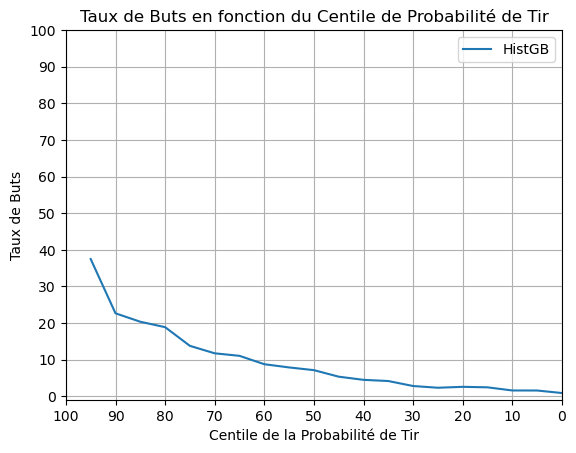

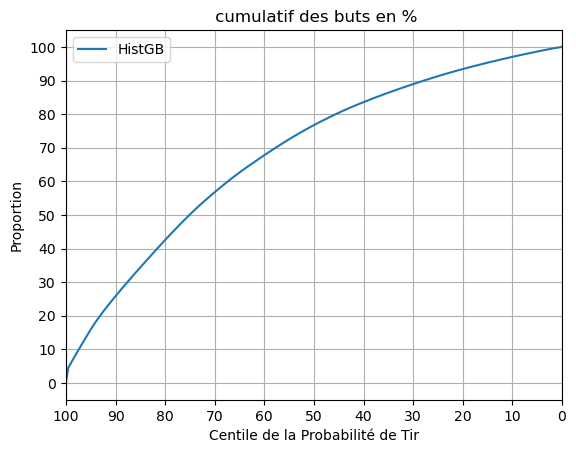

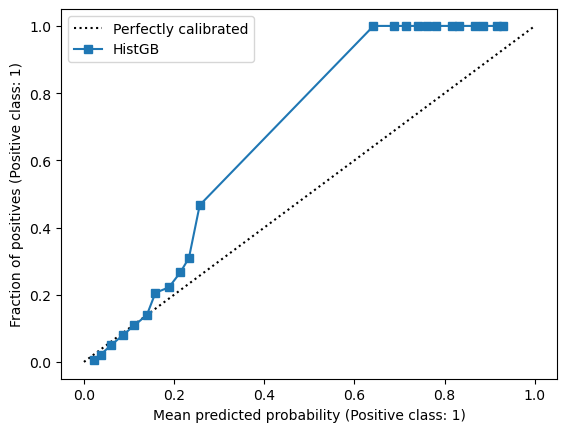

In [14]:
histGBModel = histGB.RunHistGB()

Random Forest

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/62a5959829154b05bbf2170276b26477
COMET INFO:   Metrics:
COMET INFO:     ROC AUC Score : 0.7720514612788485
COMET INFO:   Others:
COMET INFO:     Name : HistGradientBoosting
COMET INFO:   Parameters:
COMET INFO:     categorical_features            : ['prd', 'empty_net', 'rebond', 'shotCategory_Backhand', 'shotCategory_Deflected', 'shotCategory_Slap Shot', 'shotCategory_Snap Shot', 'shotCategory_Tip-In', 'shotCategory_Wrap-around', 'shotCategory_Wrist Shot', 'last_event_type_BLOCKED_SHOT', 'last_event_type_FACEOFF', 'last_event_type_GIVEAWAY', 'last_event_type_GOAL', 'last_event_type_HIT', 'last_event_type_MISSE

AUC metric : {'Random Forest': 0.7646386415229318}


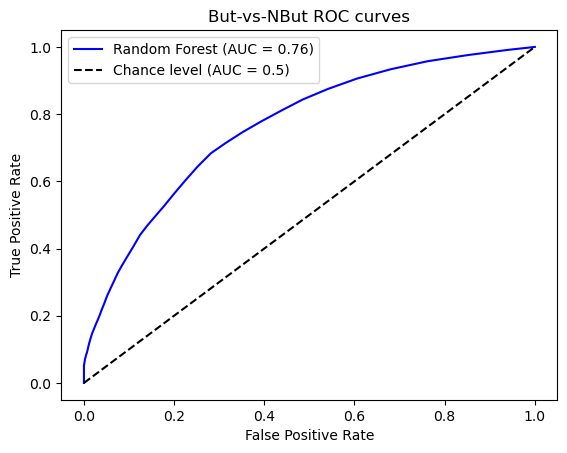

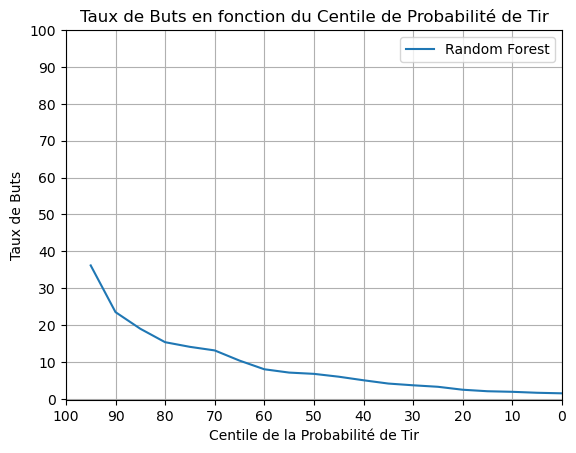

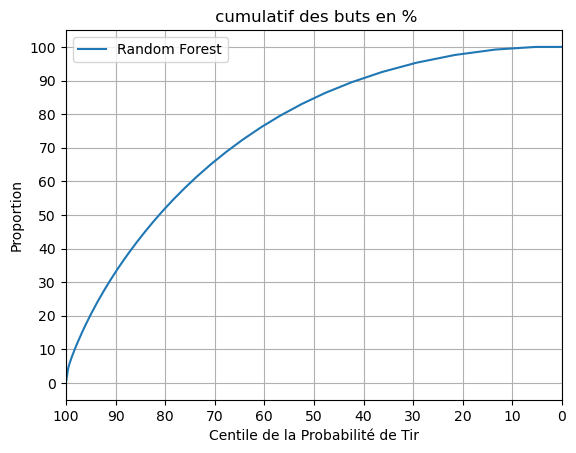

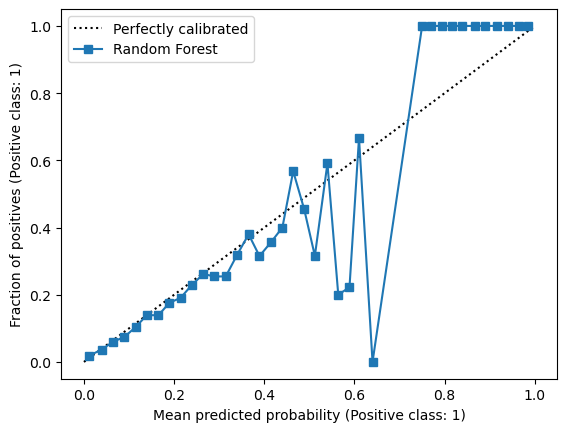

In [15]:
randomForestModel = random_forest_class.runRandomForestModelClassifier()

Boosted Logistic Reg

In [3]:
current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from scripts import Boosted_LogisticReg

[12:40:42] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "base_estimator" } are not used.

AUC metric : {'Boosted_Logistic_reg': 0.7886157026704286}


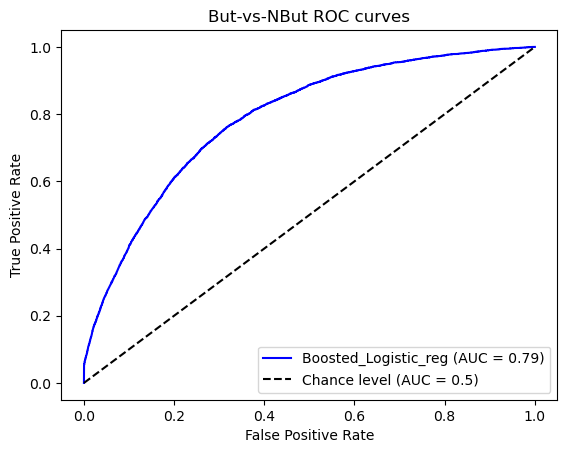

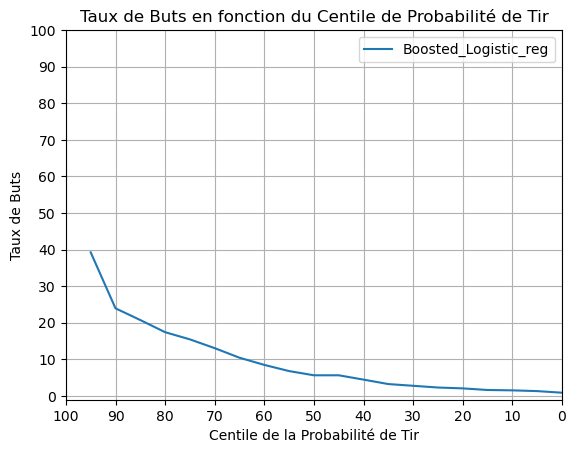

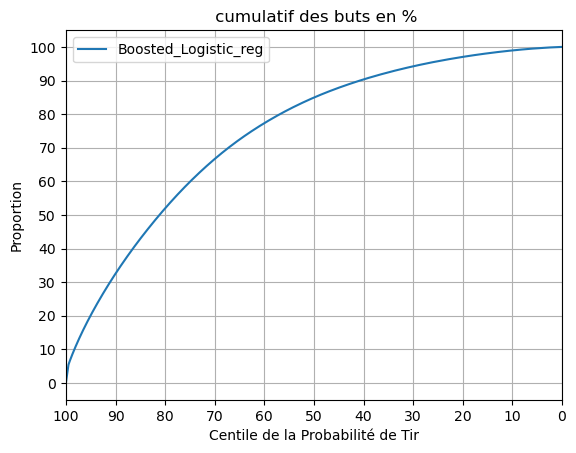

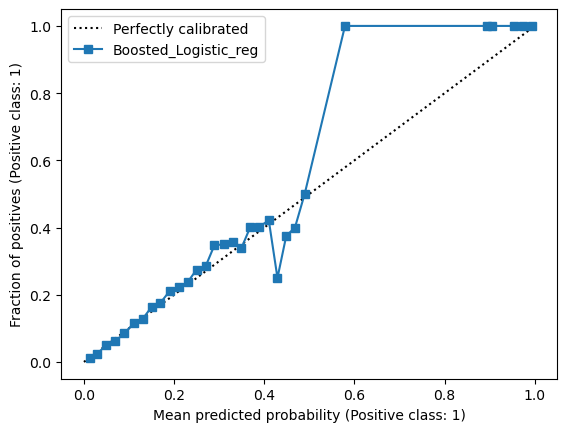

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/8b7d403e949e49629565345aa1b839a1



XGBClassifier(base_estimator=LogisticRegression(l1_ratio=0.5, max_iter=1000,
                                                penalty='elasticnet',
                                                solver='saga'),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [4]:
Boosted_LogisticReg.runBoosted_Logistic_reg(True)

# 7. Évaluer sur l'ensemble de test